In [ ]:
# Import necessary modules
#!pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Create an ImageDataGenerator for data augmentation and normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255, # Rescale pixel values between 0 and 1
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_dir = 'G:/millets/train'
test_dir = 'G:/millets/test'

In [4]:
# Create training and testing ImageDataGenerators
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 3730 images belonging to 5 classes.
Found 935 images belonging to 5 classes.


In [5]:
# Define the CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [6]:
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13680681017533972670
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4169138176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1257859606019430808
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660, pci bus id: 0000:26:00.0, compute capability: 7.5"
]


In [9]:
# Train the model on the training data
with tf.device('/device:GPU:0'):
    history = model.fit(training_set, epochs=200, validation_data=test_set)

Epoch 1/200
117/117 [==============================] - 12s 59ms/step - loss: 0.6942 - accuracy: 0.7161 - val_loss: 0.5300 - val_accuracy: 0.7818
Epoch 2/200
117/117 [==============================] - 6s 54ms/step - loss: 0.4232 - accuracy: 0.8365 - val_loss: 0.2354 - val_accuracy: 0.9390
Epoch 3/200
117/117 [==============================] - 6s 53ms/step - loss: 0.3163 - accuracy: 0.8890 - val_loss: 0.1761 - val_accuracy: 0.9444
Epoch 4/200
117/117 [==============================] - 6s 54ms/step - loss: 0.2414 - accuracy: 0.9209 - val_loss: 0.1170 - val_accuracy: 0.9626
Epoch 5/200
117/117 [==============================] - 6s 53ms/step - loss: 0.2081 - accuracy: 0.9335 - val_loss: 0.2606 - val_accuracy: 0.8781
Epoch 6/200
117/117 [==============================] - 6s 54ms/step - loss: 0.1974 - accuracy: 0.9359 - val_loss: 0.0839 - val_accuracy: 0.9829
Epoch 7/200
117/117 [==============================] - 6s 53ms/step - loss: 0.1942 - accuracy: 0.9381 - val_loss: 0.1036 - val_accuracy

117/117 [==============================] - 7s 56ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0501 - val_accuracy: 0.9882
Epoch 58/200
117/117 [==============================] - 7s 58ms/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.0384 - val_accuracy: 0.9914
Epoch 59/200
117/117 [==============================] - 7s 56ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0589 - val_accuracy: 0.9829
Epoch 60/200
117/117 [==============================] - 7s 58ms/step - loss: 0.0341 - accuracy: 0.9869 - val_loss: 0.1142 - val_accuracy: 0.9701
Epoch 61/200
117/117 [==============================] - 6s 55ms/step - loss: 0.0350 - accuracy: 0.9871 - val_loss: 0.0532 - val_accuracy: 0.9807
Epoch 62/200
117/117 [==============================] - 7s 57ms/step - loss: 0.0322 - accuracy: 0.9887 - val_loss: 0.0423 - val_accuracy: 0.9914
Epoch 63/200
117/117 [==============================] - 6s 55ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0527 - val_accuracy: 0.981

117/117 [==============================] - 6s 52ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0368 - val_accuracy: 0.9904
Epoch 114/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 0.0716 - val_accuracy: 0.9818
Epoch 115/200
117/117 [==============================] - 6s 52ms/step - loss: 0.0132 - accuracy: 0.9952 - val_loss: 0.0752 - val_accuracy: 0.9861
Epoch 116/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.0541 - val_accuracy: 0.9882
Epoch 117/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0608 - val_accuracy: 0.9882
Epoch 118/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0243 - accuracy: 0.9941 - val_loss: 0.0876 - val_accuracy: 0.9797
Epoch 119/200
117/117 [==============================] - 6s 52ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.1152 - val_accuracy:

117/117 [==============================] - 6s 52ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.0940 - val_accuracy: 0.9829
Epoch 170/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0068 - accuracy: 0.9971 - val_loss: 0.0975 - val_accuracy: 0.9882
Epoch 171/200
117/117 [==============================] - 6s 52ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.1122 - val_accuracy: 0.9861
Epoch 172/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.1030 - val_accuracy: 0.9872
Epoch 173/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0874 - val_accuracy: 0.9861
Epoch 174/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0139 - accuracy: 0.9944 - val_loss: 0.0957 - val_accuracy: 0.9882
Epoch 175/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0704 - val_accuracy:

In [10]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_set)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

30/30 [==============================] - 1s 17ms/step - loss: 0.1763 - accuracy: 0.9850
Test loss: 0.176272913813591
Test accuracy: 0.9850267171859741


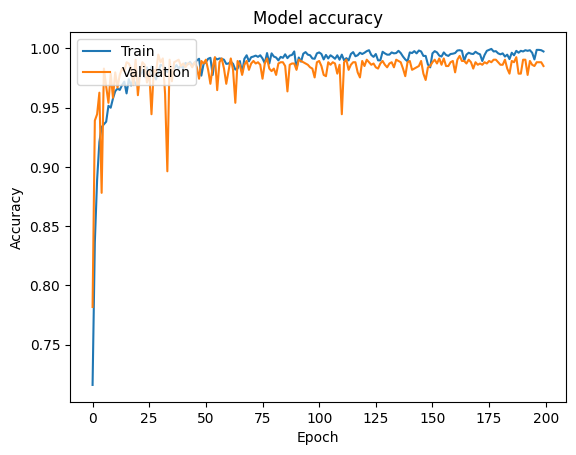

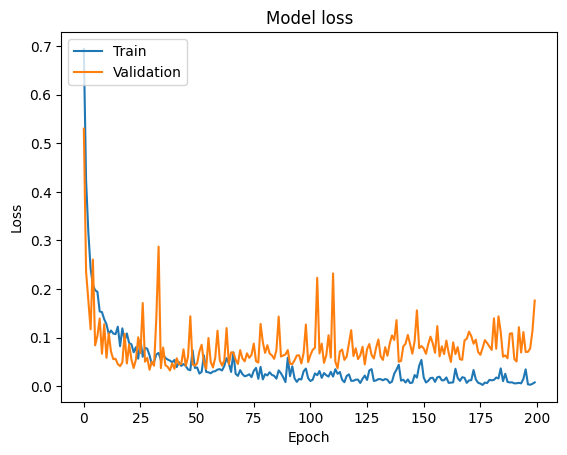

In [11]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

30/30 [==============================] - 1s 16ms/step - loss: 0.1763 - accuracy: 0.9850
Test accuracy: 0.9850267171859741


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(test_set)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")


30/30 [==============================] - 1s 17ms/step - loss: 0.1763 - accuracy: 0.9850
Test Loss: 0.18
Test Accuracy: 0.99


In [14]:
model.save('millets_cnn.h5')

In [17]:

# Compute evaluation metrics
#y_true = test_generator.classes
y_true = test_set.classes
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(test_set)
import numpy as np
# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix:\n{cm}")



Confusion Matrix:
[[ 79  28  66  93]
 [ 25  14  28  40]
 [ 63  30  59  83]
 [103  29  77 118]]


In [18]:
cr = classification_report(y_true, y_pred)
print(f"Classification Report:\n{cr}")

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.30      0.29       266
           1       0.14      0.13      0.13       107
           2       0.26      0.25      0.25       235
           4       0.35      0.36      0.36       327

    accuracy                           0.29       935
   macro avg       0.26      0.26      0.26       935
weighted avg       0.29      0.29      0.29       935



In [ ]:

# Compute Discriminant Power (DP)
dp = abs(np.diff(np.sum(y_pred.reshape(-1, 2), axis=1)))
print(f"Discriminant Power (DP): {dp:.2f}")



In [ ]:
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the training history in a variable
#history = model.fit(training_set, epochs=10, validation_data=test_set)

# Plot training & validation accuracy values
#plt.plot(history.history['accuracy'])
##plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

# Plot training & validation loss values
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

# Plot training & validation loss values
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#lt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss histories
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(train_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy histories
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Visualize accuracy history
plt.plot(epoch_count, train_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Get predicted labels and true labels for validation set
y_pred = model.predict(test_set)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = test_set.classes

# Create confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Visualize confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import matplotlib.pyplot as plt